In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Data Analysis

In [2]:
#loading dataset
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.shape

(440, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

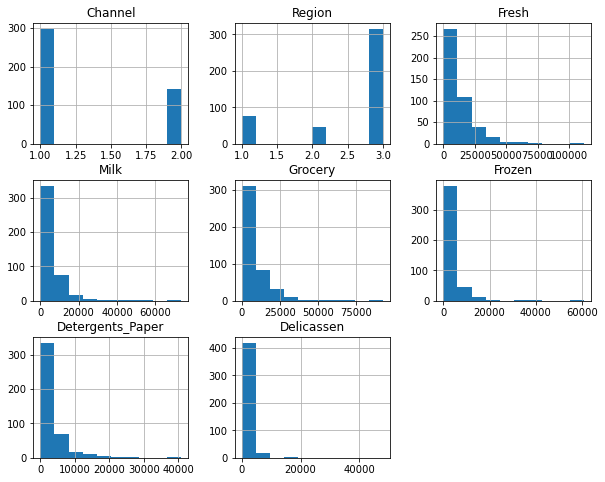

In [9]:
data.hist(figsize=(10,8))
plt.show()

<AxesSubplot:>

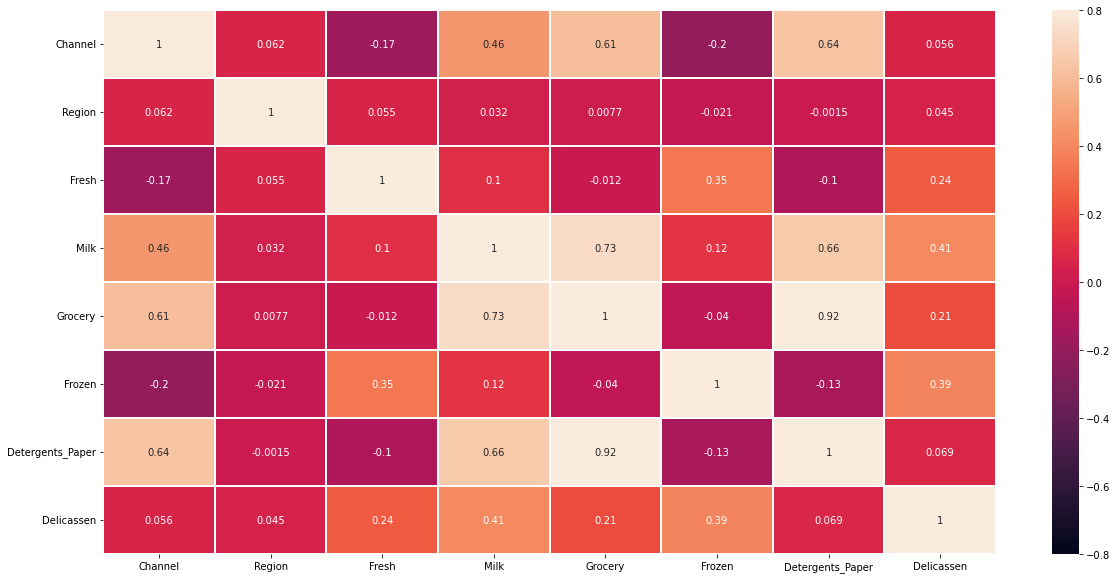

In [10]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-.8,vmax=0.8,annot=True,linewidth=0.4)

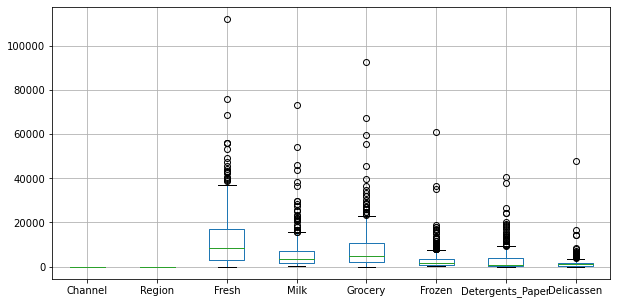

In [11]:
data.boxplot(figsize=(10,5))
plt.show()

In [12]:
data=data.drop(['Channel','Region'],axis=1)   # Dropping insignificant features for further seggregation using various algorithms
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [14]:
# Standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled =sc.fit_transform(data)
data_scaled=pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


### K-means clustering

628.3558503886846


<function matplotlib.pyplot.show(close=None, block=None)>

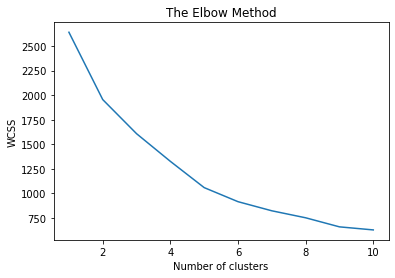

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)    #instance is ready
    kmeans.fit(data_scaled)                                                   #fitting the model
    wcss.append(kmeans.inertia_)
print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [17]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans= kmeans.fit_predict(data_scaled)

In [18]:
print(y_kmeans)

[3 1 1 3 0 3 3 3 3 1 1 3 0 1 1 3 1 3 3 3 3 3 0 1 1 3 3 3 1 0 3 3 3 0 3 1 0
 1 1 0 0 3 1 1 1 1 1 4 1 1 3 3 0 1 3 3 4 1 3 3 3 4 3 1 3 4 3 1 3 3 0 0 3 0
 3 3 3 1 3 3 3 1 1 3 3 4 4 0 3 0 3 3 4 0 1 3 3 3 3 3 1 1 3 0 3 3 1 1 3 1 3
 1 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 1 3 3 1 1 3 3 1 3 1 1 3 3 3 1 1 3 1 3 1 0 3 3 3 3 0 1 2 3
 3 3 3 1 1 3 3 3 1 3 0 0 1 3 3 1 1 0 3 3 1 3 3 3 1 3 4 3 3 1 1 1 3 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 1 1 3 3 3 3 3 4 3 0 1 0 3 3 0
 0 3 3 3 3 1 1 1 3 1 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 0 3 3 3 0 3 3 3 1 3 3
 3 3 3 3 3 1 1 1 1 1 1 3 3 1 3 0 1 3 3 1 3 3 3 1 3 3 3 3 3 0 3 3 3 3 3 1 3
 4 0 0 3 3 3 3 1 1 3 1 3 3 1 0 3 1 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 1 0 3 3 0 0 0 3 1 3 3 3 3 3 3 3 3 0 3 3 1 3 3 3 3 0 3 3 3 3 0
 1 3 3 3 3 3 0 3 3 1 3 1 3 1 3 3 3 3 0 1 0 3 3 3 0 3 3 3 0 0 1 3 3]


In [20]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=5): {silhouette_score(data_scaled, y_kmeans)}')

Silhouette Score(n=5): 0.3690403826812808


### HC

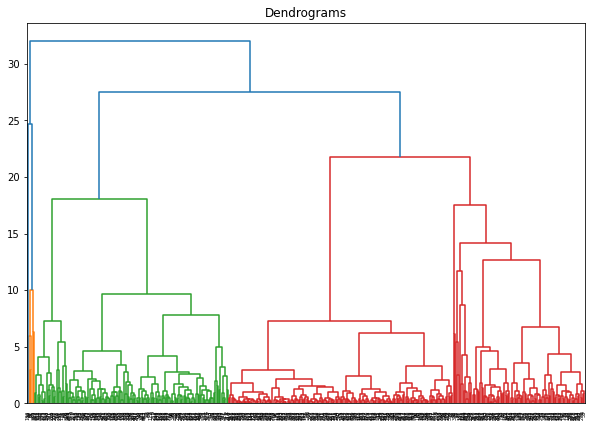

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data_scaled)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
print(f'Silhouette Score(n=2): {silhouette_score(data_scaled, y_hc)}')

Silhouette Score(n=2): 0.7924572758342273


### PCA 

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_scaled)



PCA()

In [29]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(data_scaled)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(data_scaled)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [30]:
reduced_data

,Dimension 1,Dimension 2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434
...,...,...
435,0.870602,2.220845
436,-0.902520,1.676916
437,3.465704,-1.039838
438,-0.918023,-0.030047
